## Search
원하는 데이터를 찾는 과정
- DFS
- BFS       
둘을 이해하기 위해선 자료구조 **스택**, **큐**에 대한 이해 전제

### Stack
- 유입과 유출이 같은 위치에서 벌어진다고 생각하면 편함
- stack은 별도의 라이브러리가 없다 그냥 리스트로
- 선입후
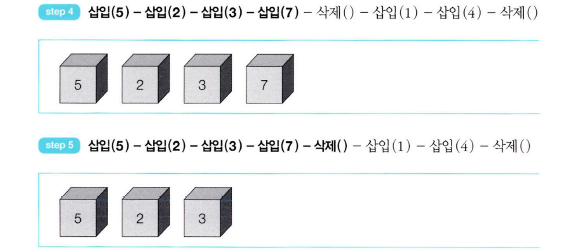

In [1]:
stack = []
stack.append(5)
stack.append(2)
stack.append(3)
stack.append(7)
stack.pop()
print(stack)
# 최상단부터 출력
print(stack[::-1])

[5, 2, 3]
[3, 2, 5]


### Queue
- 놀이공원 입장 줄 생각하면 편함
- 먼저 온 사람이 먼저 나감
- 선입선출

In [2]:
from collections import deque

que = deque()

# append를 사용하는 장점이 있는데 대신에 그림하고 반대 방향임
que.append(2)   # 2
que.append(3)   # 2 3
que.append(7)   # 2 3 7
que.popleft()   # 3 7
que.append(1)   # 3 7 1
que.popleft()   # 7 1

print(que)      # 먼저 들어온 순서대로

que.reverse()   # 나중에 들어온 원소부터 
print(que)

deque([7, 1])
deque([1, 7])


### 재귀함수
- 컴퓨터 내부에서 재귀 함수는 stack 자료구조를 이용
    - 가장 마지막에 호출한 함수가 먼저 수행을 끝내야 그 앞의 함수 호출이 종료되기 때문
- stack를 활용해야 하는 상당수 알고리즘은 재귀 함수를 이용해서 간편하게 구현
    - Ex) DFS가 대표적인 예시



## DFS
- 최대한 멀리 있는 노드를 우선 탐색
- 시작 노드의 인접 노드 중 제일 낮은 번호부터 깊게 들어갔다 나오고 그 다음 낮은 번호 차례대로 탐색하는 방식
#### 인접(adjacency) 행렬
- 2차원 배열로 그래프의 연결 관계 표현      
![스크린샷 2024-03-24 134409.png](<attachment:스크린샷 2024-03-24 134409.png>)
- graph = [[0,7,5], [7,0,INf],  [5,INF,0]]
- 단점
    - 이 방식은 모든 관계를 저장하므로 노드 개수가 많을수록 메모리 낭비
- 장점
    - 인접 리스트의 단점
    - Ex) 노드 1과 노드 7의 연결 상태 확인 => graph[1][7]
#### 인접(adjacency) 리스트
- 리스트로 그래프의 연결 관계 표현
- **연결 리스트**라는 자료구조 이용     
![스크린샷 2024-03-24 135953.png](<attachment:스크린샷 2024-03-24 135953.png>)
- 장점
    - 연결된 정보만 저장하여 메모리 효율적 사용
- 단점
    - 특정 두 노드가 연결되어 있는지에 대한 정보를 얻는 속도 느림(연결된 데이터를 하나씩 확인해야 함)
### DFS 작동 방식
1. 탐색 시작 노드를 **Stack**에 삽입, 방문 처리
2. stack의 최상단 노드에 방문하지 않은 인접 노드 있을 경우 그 인접 노드를 stack에 넣고 방문 처리, 방문 X 인접 노드가 없을 경우 stack에서 최상단 노드 꺼냄
3. 2번의 과정 더 이상 할 수 없을 때까지
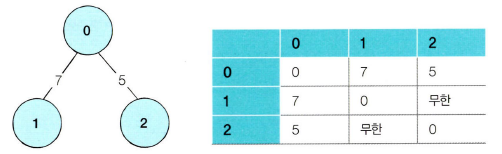
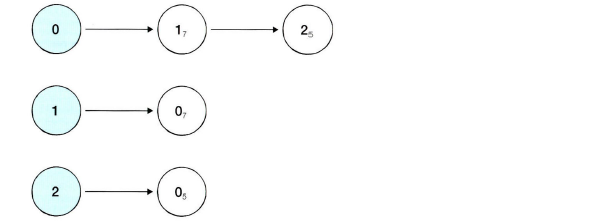

In [ ]:
def dfs(graph, start, visited):
    visited[start] = True
    print(start, end='')
    for n in graph[start]:
        if not visited[n]:
            dfs(graph, n, visited)

graph = [[], [2,3,8], [1,7], [4,5], [3,5],[3,4], [7],[2,6,8],[1,7]]
visited = [False]*9

dfs(graph, 1, visited)        

## BFS
- 가까운 노드부터 탐색하는 알고리즘
- **Queue**를 사용하는 것이 정석
- 인접 노드를 반복적으로 Queue에 넣어 먼저 들어온 것이 먼저 나가도록 하면
- 가까운 노드부터 탐색 진행
- **DFS보다 시간이 빠름**
### BFS 작동 방식
1. 탐색 시작 노드 Que에 넣고 방문 처리
2. queue에서 노드 꺼내 해당 노드의 인접 노드 중에서 방문 안한 노드 모두 queue에 삽입 후 방문 처리
3. 2번 과정 더 이상 수행 X까지  
Ex)     
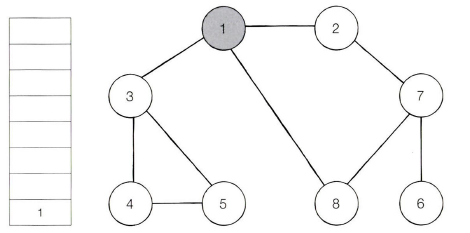      
- 시작 노드 1 큐에 삽입 후 꺼내고 방문하지 않은 인접 노드 2, 3, 8 삽입하고 1 방문처리       
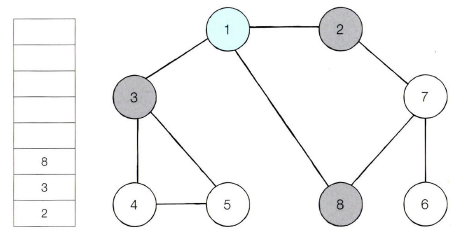      

In [3]:
from collections import deque

# idx는 각 노드 번호, 각 노드 마다 인접 노드
graph = [[], [2,3,8], [1,7], [4,5], [3,5],[3,4], [7],[2,6,8],[1,7]]
visited = [False]*9

def BFS(graph, start, visited):
    queue = deque([start])
    visited[start] = True
    # que가 빌 때까지
    while queue:
        # 삽입한 원소 추출
        v = queue.popleft()
        print(v, end='')
        # 추출한 원소의 인접 노드들
        for i in graph[v]:
            # 인접 노드들 중 방문하지 않은 노드가 있다면 Queue에 삽입
            if not visited[i]:
                queue.append(i)
                visited[i] = True

BFS(graph, 1, visited)

12387456

## DFS Vs BFS
||DFS|BFS|
|------|---|---|
|동작 원리|Stack|Queue|
|구현 방법|재귀 함수 이용|Queue 이용|

### 코테 Tip
2차원 배열 탐색 문제 만나면 그래프 형태로 바꿔서 생각하면 쉽다      
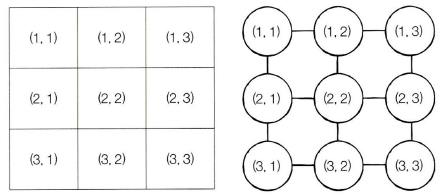